In [33]:
import pandas as pd 
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from gensim.models import word2vec
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm
import json
from langdetect import detect

import warnings
warnings.filterwarnings("ignore")

In [2]:
#nltk.download("stopwords")
#nltk.download('wordnet')
#nltk.download('punkt')

In [3]:
metadata=pd.read_csv("./metadata.csv", usecols=['title','abstract'])
metadata["abstract"] = metadata["abstract"].str.lower()
metadata['title'] = metadata['title'].str.lower()
print(metadata.shape)

(140532, 2)


In [4]:
papers = metadata.dropna()
papers.head()

,title,abstract
0,clinical features of culture-proven mycoplasma...,objective: this retrospective chart review des...
1,nitric oxide: a pro-inflammatory mediator in l...,inflammatory diseases of the respiratory tract...
2,surfactant protein-d and pulmonary host defense,surfactant protein-d (sp-d) participates in th...
3,role of endothelin-1 in lung disease,endothelin-1 (et-1) is a 21 amino acid peptide...
4,gene expression in epithelial cells in respons...,respiratory syncytial virus (rsv) and pneumoni...


In [5]:
papers.shape

(109612, 2)

In [6]:
stop = set(stopwords.words('english'))
stop |= set(['title','abstract','preprint','biorxiv','read','author','funder','copyright','holder','https','license','et','al','may',
             'also','medrxiv','granted','reuse','rights','used','reserved','peer','holder','figure','fig','table','doi','within'])
lemmatizer = WordNetLemmatizer()

In [7]:
def data_preprocessing(text):
    text = ' '.join(re.sub('https?://\S+|www\.\S+','',text).split())
    text = text.replace('\n', '')
    text = re.sub("[!@#$+%*:()/<.=,—']", '', text)
    text = ' '.join([word for word in text.split() if word not in stop])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [8]:
papers['title'] = papers['title'].apply(lambda x: data_preprocessing(x))
papers['abstract'] = papers['abstract'].apply(lambda x: data_preprocessing(x))

In [34]:
#nltk.download('punkt')
#nltk.download('stopwords')
    
papers['lang'] = papers['title'].apply(lambda x: detect(x))

In [36]:
papers.head()

,title,abstract,virus,topic,title_tokenized,abstract_tokenized,title_embedding,abstract_embedding,cos_sim,lang
0,clinical feature culture-proven mycoplasma pne...,objective retrospective chart review describes...,None,non-pharmaceutical interventions,"[clinical, feature, culture-proven, mycoplasma...","[objective, retrospective, chart, review, desc...","[0.5755492400091428, 0.5071589863644197, 0.701...","[0.517865796026521, 0.02839123241379062, 0.661...",0.284918,en
1,nitric oxide pro-inflammatory mediator lung di...,inflammatory disease respiratory tract commonl...,None,genetics|origin|evolution,"[nitric, oxide, pro-inflammatory, mediator, lu...","[inflammatory, disease, respiratory, tract, co...","[0.7680924907326698, 0.9851941180725893, 0.324...","[-0.1132180712884292, 0.6737260116700104, 0.79...",0.412714,en
2,surfactant protein-d pulmonary host defense,surfactant protein-d sp-d participates innate ...,None,genetics|origin|evolution,"[surfactant, protein-d, pulmonary, host, defense]","[surfactant, protein-d, sp-d, participates, in...","[-0.07003243044018745, 1.2900880962610244, 0.1...","[0.1994103560282383, 0.8289851985833566, 0.736...",0.376964,en
3,role endothelin-1 lung disease,endothelin-1 et-1 21 amino acid peptide divers...,None,medical care,"[role, endothelin-1, lung, disease]","[endothelin-1, et-1, 21, amino, acid, peptide,...","[0.018649086356163025, 0.7395711336284876, -0....","[-0.02535907058045268, 1.0175414433702827, 0.6...",0.325903,en
4,gene expression epithelial cell response pneum...,respiratory syncytial virus rsv pneumonia viru...,None,genetics|origin|evolution,"[gene, expression, epithelial, cell, response,...","[respiratory, syncytial, virus, rsv, pneumonia...","[0.020802484026976993, 0.8970254574503217, -0....","[-0.1940359590147194, 0.8681236988254445, 0.98...",0.546844,fr


In [37]:
papers = papers[papers.lang == "en"]

In [38]:
papers.head()

,title,abstract,virus,topic,title_tokenized,abstract_tokenized,title_embedding,abstract_embedding,cos_sim,lang
0,clinical feature culture-proven mycoplasma pne...,objective retrospective chart review describes...,None,non-pharmaceutical interventions,"[clinical, feature, culture-proven, mycoplasma...","[objective, retrospective, chart, review, desc...","[0.5755492400091428, 0.5071589863644197, 0.701...","[0.517865796026521, 0.02839123241379062, 0.661...",0.284918,en
1,nitric oxide pro-inflammatory mediator lung di...,inflammatory disease respiratory tract commonl...,None,genetics|origin|evolution,"[nitric, oxide, pro-inflammatory, mediator, lu...","[inflammatory, disease, respiratory, tract, co...","[0.7680924907326698, 0.9851941180725893, 0.324...","[-0.1132180712884292, 0.6737260116700104, 0.79...",0.412714,en
2,surfactant protein-d pulmonary host defense,surfactant protein-d sp-d participates innate ...,None,genetics|origin|evolution,"[surfactant, protein-d, pulmonary, host, defense]","[surfactant, protein-d, sp-d, participates, in...","[-0.07003243044018745, 1.2900880962610244, 0.1...","[0.1994103560282383, 0.8289851985833566, 0.736...",0.376964,en
3,role endothelin-1 lung disease,endothelin-1 et-1 21 amino acid peptide divers...,None,medical care,"[role, endothelin-1, lung, disease]","[endothelin-1, et-1, 21, amino, acid, peptide,...","[0.018649086356163025, 0.7395711336284876, -0....","[-0.02535907058045268, 1.0175414433702827, 0.6...",0.325903,en
5,sequence requirement rna strand transfer nidov...,nidovirus subgenomic mrna contain leader seque...,None,genetics|origin|evolution,"[sequence, requirement, rna, strand, transfer,...","[nidovirus, subgenomic, mrna, contain, leader,...","[1.4055073022842408, 0.022652968019247054, 0.4...","[0.9527188723894512, 0.36109722232594427, 0.60...",0.323502,en


In [39]:
papers.reset_index()
papers.head()

,title,abstract,virus,topic,title_tokenized,abstract_tokenized,title_embedding,abstract_embedding,cos_sim,lang
0,clinical feature culture-proven mycoplasma pne...,objective retrospective chart review describes...,None,non-pharmaceutical interventions,"[clinical, feature, culture-proven, mycoplasma...","[objective, retrospective, chart, review, desc...","[0.5755492400091428, 0.5071589863644197, 0.701...","[0.517865796026521, 0.02839123241379062, 0.661...",0.284918,en
1,nitric oxide pro-inflammatory mediator lung di...,inflammatory disease respiratory tract commonl...,None,genetics|origin|evolution,"[nitric, oxide, pro-inflammatory, mediator, lu...","[inflammatory, disease, respiratory, tract, co...","[0.7680924907326698, 0.9851941180725893, 0.324...","[-0.1132180712884292, 0.6737260116700104, 0.79...",0.412714,en
2,surfactant protein-d pulmonary host defense,surfactant protein-d sp-d participates innate ...,None,genetics|origin|evolution,"[surfactant, protein-d, pulmonary, host, defense]","[surfactant, protein-d, sp-d, participates, in...","[-0.07003243044018745, 1.2900880962610244, 0.1...","[0.1994103560282383, 0.8289851985833566, 0.736...",0.376964,en
3,role endothelin-1 lung disease,endothelin-1 et-1 21 amino acid peptide divers...,None,medical care,"[role, endothelin-1, lung, disease]","[endothelin-1, et-1, 21, amino, acid, peptide,...","[0.018649086356163025, 0.7395711336284876, -0....","[-0.02535907058045268, 1.0175414433702827, 0.6...",0.325903,en
5,sequence requirement rna strand transfer nidov...,nidovirus subgenomic mrna contain leader seque...,None,genetics|origin|evolution,"[sequence, requirement, rna, strand, transfer,...","[nidovirus, subgenomic, mrna, contain, leader,...","[1.4055073022842408, 0.022652968019247054, 0.4...","[0.9527188723894512, 0.36109722232594427, 0.60...",0.323502,en


Text(0.5, 1.0, 'Figure 1. abstract Corpus Word Cloud')

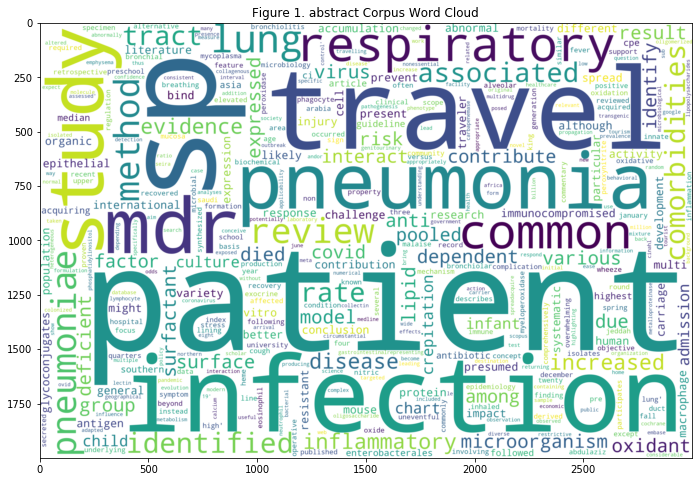

In [40]:
contentCorpus = papers.abstract.values
plt.figure(figsize = (12, 8))
wordcloud = WordCloud(width = 3000,height = 2000,background_color="white",max_words=1000).generate(str(contentCorpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Figure 1. abstract Corpus Word Cloud')

Text(0.5, 1.0, 'Figure 2. Title Corpus Word Cloud')

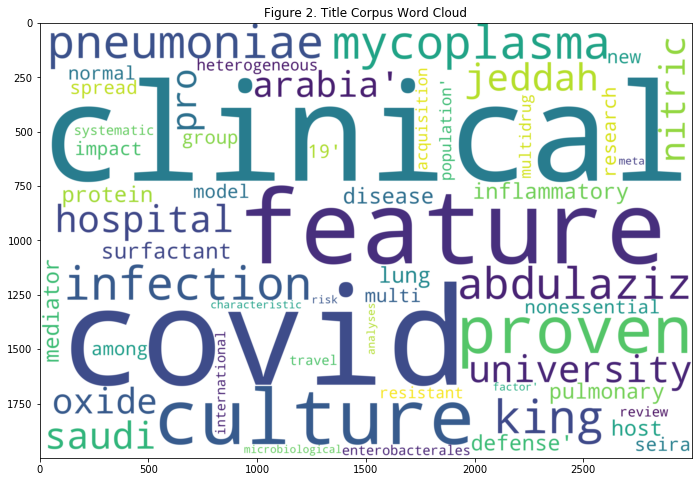

In [41]:
contentCorpus = papers.title.values
plt.figure(figsize = (12, 8))
wordcloud = WordCloud(width = 3000,height = 2000,background_color="white",max_words=10000).generate(str(contentCorpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Figure 2. Title Corpus Word Cloud')

In [42]:
papers['virus'] = np.where(papers.abstract.str.contains('covid-19|covid|wuhan'), 'covid-19',
              np.where(papers.abstract.str.contains('alphacoronavirus|alpha-cov'), 'alphacoronavirus',
              np.where(papers.abstract.str.contains('betacoronavirus|mers|mers-cov|sars|sars-cov|sars-cov2'), 'betacoronavirus',
              np.where(papers.abstract.str.contains('gammacoronavirus|ibv'), 'gammacoronavirus',
              "None"))))

In [43]:
papers['virus'].value_counts()

None                63441
covid-19            17085
betacoronavirus      8625
gammacoronavirus      990
alphacoronavirus      130
Name: virus, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

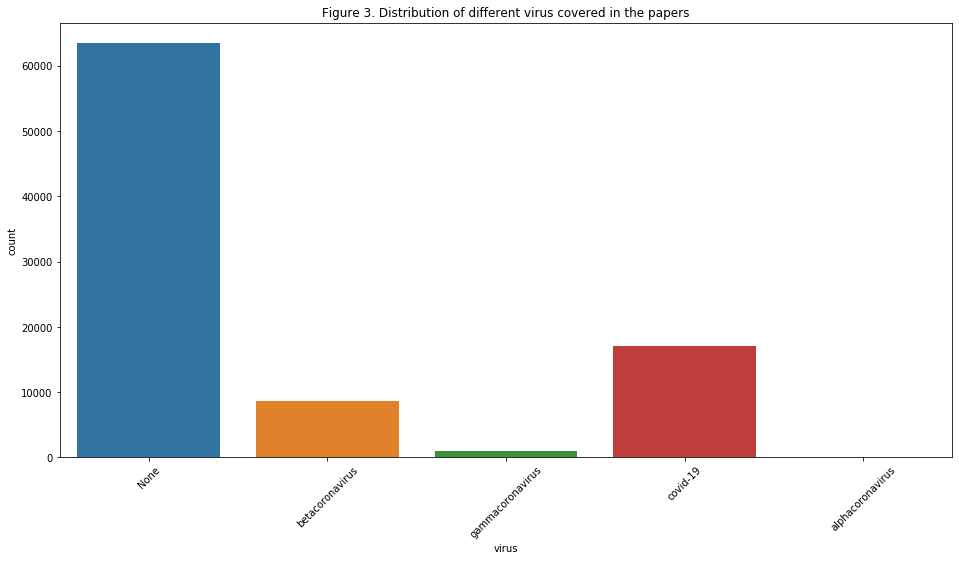

In [44]:
plt.figure(figsize = (16, 8))
ax = sns.countplot(x="virus", data=papers)
ax.set_title('Figure 3. Distribution of different virus covered in the papers')
plt.xticks(rotation=45)

In [45]:
papers['topic'] = np.where(papers.abstract.str.contains('transmission|transmitting'), 'transmission',
              np.where(papers.abstract.str.contains('incubation'), 'incubation',
              np.where(papers.abstract.str.contains('vaccines|vaccine|vaccination|therapeutics|therapeutic|drug|drugs'), 'vaccines|therapeutics',
              np.where(papers.abstract.str.contains('gene|origin|evolution|genetics|genomes|genomic'), 'genetics|origin|evolution',
              np.where(papers.abstract.str.contains('npi|npis|interventions|distancing|isolating|isolation|isolate|mask'), 'non-pharmaceutical interventions',
              np.where(papers.abstract.str.contains('ards|ecmo|respirators|eua|clia|ventilation|cardiomyopathy|ai'), 'medical care',
              np.where(papers.abstract.str.contains('ethical|social|media|rumor|misinformation|ethics|multidisciplinary'), 'ethical|social',
              "None")))))))

In [46]:
papers['topic'].value_counts()

medical care                        30093
genetics|origin|evolution           22082
vaccines|therapeutics               14713
None                                10187
transmission                         7027
non-pharmaceutical interventions     3561
ethical|social                       1922
incubation                            686
Name: topic, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

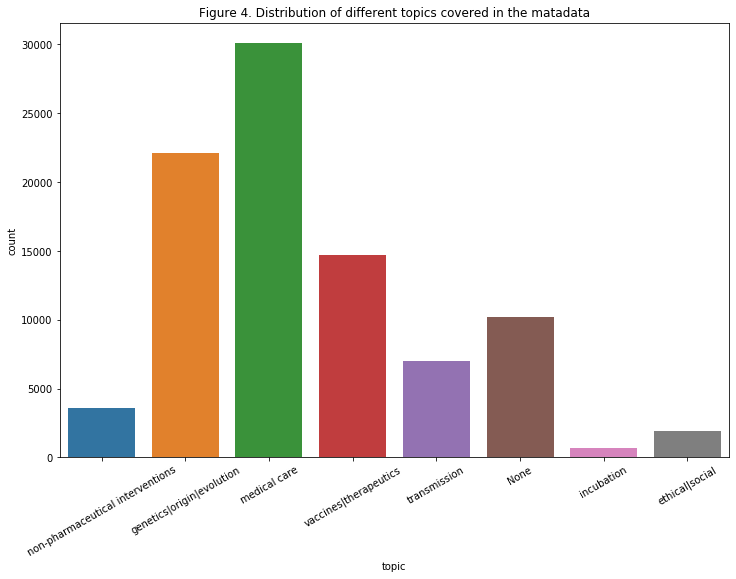

In [47]:
plt.figure(figsize = (12, 8))
ax = sns.countplot(x="topic", data=papers)
ax.set_title('Figure 4. Distribution of different topics covered in the matadata')
plt.xticks(rotation=30)

In [48]:
tokenized_sentences_title = [sentence.split() for sentence in papers['title'].values]
tokenized_sentences_abstract = [sentence.split() for sentence in papers['abstract'].values]

In [49]:
papers['title_tokenized'] = tokenized_sentences_title
papers['abstract_tokenized'] = tokenized_sentences_abstract

In [50]:
model = word2vec.Word2Vec(tokenized_sentences_abstract, size = 100, min_count=1)

In [51]:
def buildWordVector(word_list, size):
    #function to average all words vectors in a given paragraph
    vec = np.zeros(size)
    count = 0.
    for word in word_list:
        if word in model.wv:
            vec += model.wv[word]
            count += 1.
    if count != 0:
        vec /= count
    return vec

In [52]:
papers['title_embedding'] = papers['title_tokenized'].apply(lambda x: buildWordVector(x, size = 100))
papers['abstract_embedding'] = papers['abstract_tokenized'].apply(lambda x: buildWordVector(x, size = 100))

In [53]:
papers.head(10)

,title,abstract,virus,topic,title_tokenized,abstract_tokenized,title_embedding,abstract_embedding,cos_sim,lang
0,clinical feature culture-proven mycoplasma pne...,objective retrospective chart review describes...,None,non-pharmaceutical interventions,"[clinical, feature, culture-proven, mycoplasma...","[objective, retrospective, chart, review, desc...","[-0.29414128168271136, -0.013632757329525283, ...","[-0.23970264778472483, 0.6150727204789646, 0.0...",0.284918,en
1,nitric oxide pro-inflammatory mediator lung di...,inflammatory disease respiratory tract commonl...,None,genetics|origin|evolution,"[nitric, oxide, pro-inflammatory, mediator, lu...","[inflammatory, disease, respiratory, tract, co...","[0.9386491812765598, 0.8511481533447901, -0.11...","[-0.4519712785800356, 0.9138955498319986, 0.33...",0.412714,en
2,surfactant protein-d pulmonary host defense,surfactant protein-d sp-d participates innate ...,None,genetics|origin|evolution,"[surfactant, protein-d, pulmonary, host, defense]","[surfactant, protein-d, sp-d, participates, in...","[-0.5055236529558897, 0.9855476155877113, -1.0...","[-0.34124989701876307, 1.2101420013428623, 0.0...",0.376964,en
3,role endothelin-1 lung disease,endothelin-1 et-1 21 amino acid peptide divers...,None,medical care,"[role, endothelin-1, lung, disease]","[endothelin-1, et-1, 21, amino, acid, peptide,...","[-0.7251934744417667, 0.731202770024538, -0.87...","[-0.48475082144141196, 1.3069520642980934, 0.0...",0.325903,en
5,sequence requirement rna strand transfer nidov...,nidovirus subgenomic mrna contain leader seque...,None,genetics|origin|evolution,"[sequence, requirement, rna, strand, transfer,...","[nidovirus, subgenomic, mrna, contain, leader,...","[0.26312920451164246, 1.1426111344248056, 0.13...","[0.21243012341283327, 1.144538430826722, 0.033...",0.323502,en
7,synthesis novel hepatitis c virus protein ribo...,hepatitis c virus hcv important human pathogen...,None,vaccines|therapeutics,"[synthesis, novel, hepatitis, c, virus, protei...","[hepatitis, c, virus, hcv, important, human, p...","[-0.2745293928310275, 2.0676370416767895, 0.95...","[-0.258925208578939, 1.8253704032698728, 0.311...",0.373658,en
8,structure coronavirus main proteinase reveals ...,key enzyme coronavirus polyprotein processing ...,betacoronavirus,genetics|origin|evolution,"[structure, coronavirus, main, proteinase, rev...","[key, enzyme, coronavirus, polyprotein, proces...","[-0.08858439800414172, 1.4026929492300206, 1.4...","[0.07300538146676862, 1.3905192915106488, 0.67...",0.304484,en
10,debate transfusing normal haemoglobin level im...,recent evidence suggests critically ill patien...,None,genetics|origin|evolution,"[debate, transfusing, normal, haemoglobin, lev...","[recent, evidence, suggests, critically, ill, ...","[-1.0060706590967519, 0.9198152412261281, 0.84...","[-1.3877849588791529, 1.0421629512806734, 0.48...",0.402104,en
11,21st international symposium intensive care em...,21st international symposium intensive care em...,None,medical care,"[21st, international, symposium, intensive, ca...","[21st, international, symposium, intensive, ca...","[-0.7274107057601213, 0.6287630734344324, -0.6...","[-1.1609725138226237, 1.1651477917957191, -0.0...",0.183725,en
12,airborne rhinovirus detection effect ultraviol...,background rhinovirus common cause upper respi...,None,transmission,"[airborne, rhinovirus, detection, effect, ultr...","[background, rhinovirus, common, cause, upper,...","[-0.12451361119747162, 1.160712120682001, 0.27...","[-0.3401599462955229, 0.9245500954468885, 0.68...",0.623345,en


In [54]:
def embedding_query(query):
    query = query.split(' ')
    query_vec = np.zeros(100).reshape((1,100))
    count = 0
    for word in query:
        if word in model.wv:
            query_vec += model.wv[word]
            count += 1.
    if count != 0:
        query_vec /= count
    return query_vec

In [55]:
def get_similarity(query,n_top):
    query_vec = embedding_query(query)
    papers["cos_sim"] = papers['abstract_embedding'].apply(
        lambda x: metrics.pairwise.cosine_similarity(
            [x],query_vec.reshape(1,-1))[0][0])
    top_list = (papers.sort_values("cos_sim", ascending=False)
                [["title","abstract","cos_sim"]]
                .drop_duplicates()[:n_top])
    return top_list

In [56]:
get_similarity('transmission incubation in human ',10)

,title,abstract,cos_sim
129513,possibility transmission dog contributing fact...,covid‑19 origin transmission human covid‑19 in...,0.798300
88085,[editorial] possibility transmission dog contr...,covid­19 origin transmission human covid­19 in...,0.797069
76739,potential zoonotic transmission non-primate fo...,zoonotic introduction animal pathogen human po...,0.764490
12675,potential zoonotic transmission non‐primate fo...,zoonotic introduction animal pathogen human po...,0.762780
119803,blocking transmission middle east respiratory ...,ongoing middle east respiratory syndrome coron...,0.762554
127525,lack middle east respiratory syndrome coronavi...,determine risk middle east respiratory syndrom...,0.760337
123722,quantifying seasonal driver transmission lassa...,lassa fever lf zoonotic disease widespread wes...,0.758373
115193,stochastic dynamic epidemic recurrent spillove...,emerging human infectious disease animal origi...,0.757570
133290,mers emergence novel human coronavirus,novel coronavirus cov cause severe lower respi...,0.754929
124792,cross host transmission emergence mers coronav...,coronaviruses covs able infect human emerge cr...,0.750724


In [57]:
get_similarity('risk covid-19',10)

,title,abstract,cos_sim
85417,self-care medical staff primary care issue nee...,self-care essential primary care professional ...,0.806181
119455,risk perception evidence driven harmful policy...,covid-19 hit cognitive trigger lay public misj...,0.800742
65791,pre-existing cardiovascular disease united sta...,background purpose increasing recognition rela...,0.797220
125547,need manage risk thromboembolism covid-19 patient,covid-19 first presented wuhan hubei province ...,0.791919
90395,covid-19 diabetic patient related risk specifi...,diabetes among frequently reported comorbiditi...,0.791330
129171,covid-19 diabetic patient related risk specifi...,diabetes among frequently reported comorbiditi...,0.791016
139096,urgent guidance navigating circumventing qtc-p...,coronavirus disease 19 covid-19 global pandemi...,0.790075
66222,estimating risk covid-19 infection adult chemo...,sars-cov-2 covid-19 novel coronavirus represen...,0.788669
87330,urgent guidance navigating circumventing qtc-p...,coronavirus disease 19 covid-19 global pandemi...,0.787287
64919,covid-19 oral disease manage hospitalized quar...,know importance managing oral health patient c...,0.783334


In [58]:
get_similarity('covid-19 genetics origin evolution',10)

,title,abstract,cos_sim
103092,phylogenetic perspective epidemiology origin s...,severe acute respiratory syndrome sars respira...,0.809976
60536,deep phylogenetic analysis orthocoronavirinae ...,outbreak severe acute respiratory syndrome cor...,0.798119
65410,emerging phylogenetic structure sars-cov-2 pan...,since spilling human sars-cov-2 rapidly spread...,0.795192
111341,genomic perspective origin emergence sars-cov-2,ongoing pandemic new human coronavirus sars-co...,0.794908
114789,direct rna sequencing early evolution sars-cov-2,fundamental aspect sars-cov-2 biology remain d...,0.786902
66532,genomic geographic temporal distribution sars-...,covid-19 pandemic significant public health is...,0.776589
112809,evolutionary medicine iv evolution emergence n...,article discus evolutionary ecological factor ...,0.775307
93908,sars-cov-2 variant relevance symptom granulari...,origin sars-cov-2 virus remains enigmatic like...,0.772036
24534,pro con application evolutionary theory evolut...,outbreak severe acute respiratory syndrome cor...,0.771027
101858,sars-coronavirus ancestor’s foot-prints south-...,one great challenge ecology infectious disease...,0.767301


In [59]:
get_similarity('drugs medicine to treat covid-19 patients',10)

,title,abstract,cos_sim
93735,[strategy pharmaceutical care service clinical...,outbreak coronavirus disease 2019covid-19 seri...,0.819718
60735,thought prevention treatment coronavirus disea...,etiology pathogenesis coronavirus disease 2019...,0.812544
90468,[analysis property efficacy traditional chines...,coronavirus disease 2019covid-19 triggered sev...,0.797497
42920,[analysis property efficacy traditional chines...,coronavirus disease 2019covid-19 triggered sev...,0.797431
97963,coronavirus drug water warning virus-research ...,one world’s best hope treating covid-19 compou...,0.795424
51228,[research progress intervention chinese herbal...,outbreak caused 2019 novel coronavirus2019-nco...,0.793480
93659,[research progress intervention chinese herbal...,outbreak caused 2019 novel coronavirus2019-nco...,0.793400
99570,covid-19 pandemic medicine still evidence-based?,randomized controlled trial demonstrated effic...,0.787310
138785,breakthrough chloroquine phosphate shown appar...,coronavirus disease 2019 covid-19 virus spread...,0.785015
90165,rheumotologitsts view use hydroxychloroquine t...,current pandemic coronavirus disease 2019 covi...,0.772662
